In [1]:
#Importing standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.express as px

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0) #Using ID as index column.
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe() #Checking the statistics of the data


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#Checking the null values.
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

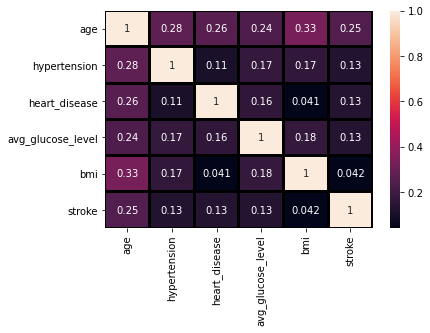

In [12]:
sns.heatmap(df.corr(), linewidths=2, linecolor='black', annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f97b9bb0>,
      dtype=object)

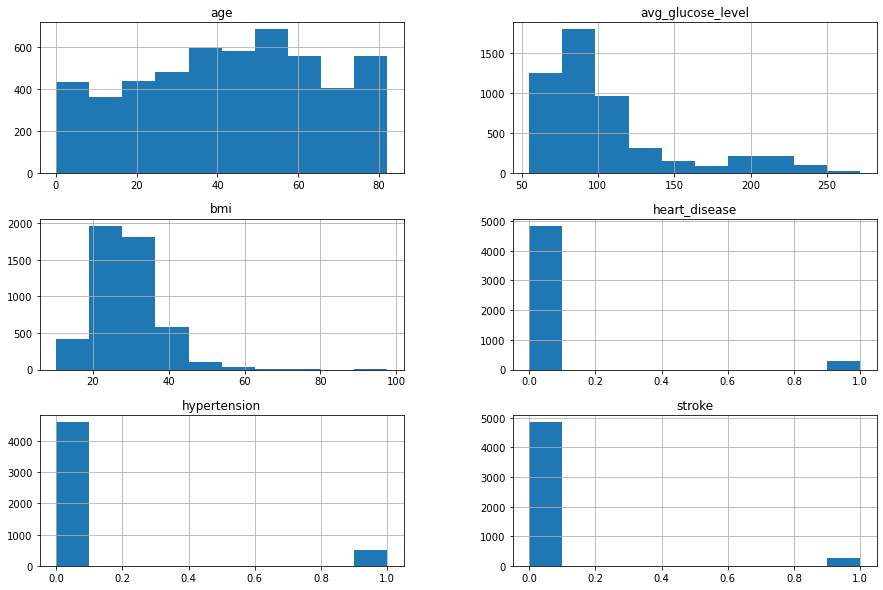

In [17]:
#Checking the distribution of the data
df.hist(figsize=(15,10))

From the Data above, it can be inferred that:

1: Age has an approximate normal distribution.

2: Average glucose level and Hypertension are right skewed.


In [8]:
len(df[df['bmi'].isnull()])/len(df) #Checking the percentage of data missing.

0.03933463796477495

In [9]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
df.groupby(['hypertension'])['bmi'].median() #Grouping the median of the bmi with respect to the hypertension.

hypertension
0    27.7
1    31.8
Name: bmi, dtype: float64

In [20]:
def Missing_Value_Imputer(df):
    # 0 is the feature with respect to which the values of b will be imputed.
    # 1 is the feature that will be filled.
    bmi=df[0]
    hypertension=df[1]
    
    if pd.isnull(bmi):
        if hypertension==0:
            return 27.7 
        if hypertension==1:
            return 31.8
    return bmi
df['bmi']=df[['bmi','hypertension']].apply(Missing_Value_Imputer,1)

In [22]:
#Checking the missing values again.
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
px.histogram(df, x='gender', color= 'stroke') #Comparing the gender with respect to the stroke.

In [23]:
px.histogram(df, x='hypertension', color= 'stroke') #Comparing the hypertension with respect to the stroke.

In [24]:
px.histogram(df, x='smoking_status', color= 'stroke')

In [26]:
px.histogram(df, x='age', color= 'stroke',facet_col_spacing=10) #Comparing age with the stroke

From the graph above, it can be concluded that the risk of getting a stroke increases with age.

In [28]:
px.histogram(df, x='avg_glucose_level', color= 'stroke',facet_col_spacing=10) #Comparing glucose level with the stroke

In [30]:
#Now, lets perform some preprocessing before heading towards machine learning.
from sklearn.preprocessing import StandardScaler, LabelEncoder 
std=StandardScaler()
le=LabelEncoder()

In [31]:
def encode(df):
    categorical=list(df.select_dtypes(include=['category','object'])) #Takes categorical features into account.
    for feature in categorical: #Iterates over every feature.
        try:
            df[feature] = le.fit_transform(df[feature]) #Encodes each and every value of a particular feature.
        except:
            print('Error encoding '+feature) #Throws an error if a feature failed the task.
    return df
data=encode(df)

In [32]:
data.head()
    

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
51676,0,61.0,0,0,1,3,0,202.21,27.7,2,1
31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


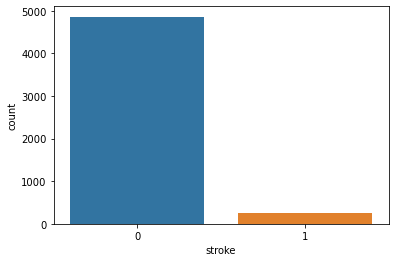

In [15]:
sns.countplot(df['stroke']) #Checking if the dataset is balanced.

In [33]:
px.scatter(x=df['age'],y=df['stroke'])

In [93]:
X=data.drop(['stroke'],1)
y=data['stroke']



In [94]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)
#Converting the X Variable above into a dataframe for better use.
X_sm=pd.DataFrame(X_sm)

In [95]:
y_sm.value_counts() #We have successfully oversampled the data.

1    4861
0    4861
Name: stroke, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split #Dividing the dataset into train and test data.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=33, stratify=y_sm) 

Before proceeding to machine learning, lets check the features that are the most important for the evaluation of 
the target variable.


# Mutual Information Classifier
Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable. A quantity called mutual information measures the amount of information one can obtain from one random variable given another.



gender               0.000049
age                  0.040613
hypertension         0.002568
heart_disease        0.003773
ever_married         0.006333
work_type            0.009652
Residence_type       0.000000
avg_glucose_level    0.005782
bmi                  0.009824
smoking_status       0.008405
dtype: float64


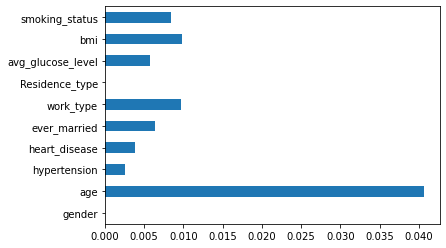

In [100]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances, X.columns[0:len(X.columns)])
print(feat_imp)
feat_imp.plot(kind='barh')
plt.show()

From the graph above, it can be concluded that the residence type and the gender does not have a significant importance for the evaluation of stroke. Hence, we can drop these functions to improve our computational time.

In [101]:
X.drop(['Residence_type','gender'],1, inplace=True)

In [58]:
#Lets import the machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
log_reg=LogisticRegression()
dt_clf=DecisionTreeClassifier()
rnd_clf=RandomForestClassifier()
ad_clf=AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()

In [72]:
#importing evaluation metrics.
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [65]:
classifiers=[log_reg,dt_clf,rnd_clf,ad_clf,grad_clf]

In [66]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0010277492291880781, 0.00102...","[0.0, 0.00102880658436214, 0.02777777777777777...",0.900346
DecisionTreeClassifier,"[0.0, 0.10894141829393628, 1.0]","[0.0, 0.9238683127572016, 1.0]",0.907463
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.18415637860082304, 0.33127572016460904...",0.993659
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00102880658436214, 0.00308641975308641...",0.934073
GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00102880658436214, 0.00308641975308641...",0.955849


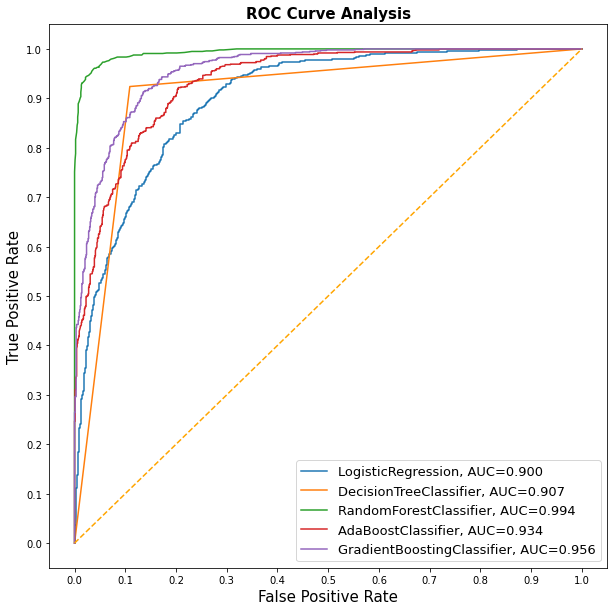

In [68]:
fig = plt.figure(figsize=(10,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']));
    
plt.plot([0,1], [0,1], color='orange', linestyle='--');

plt.xticks(np.arange(0.0, 1.1, step=0.1));
plt.xlabel("False Positive Rate", fontsize=15);

plt.yticks(np.arange(0.0, 1.1, step=0.1));
plt.ylabel("True Positive Rate", fontsize=15);

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15);
plt.legend(prop={'size':13}, loc='lower right');

From the graph above, we can conclude that the Random Forest Classifier did the best job at splitting the data.

In [78]:
#Now lets cross validate our data.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
cross_val = KFold(n_splits=5, random_state=33, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.9852351535199233


In [80]:
#Now, lets select the best parameters for Random Forest model.
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [81]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rnd_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [82]:
rf_random.best_params_

{'n_estimators': 555,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 46,
 'bootstrap': False}

In [83]:
rnd_pred=rf_random.predict(X_test)
print(classification_report(y_test, rnd_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       973
           1       0.95      0.97      0.96       972

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



We have achieved a good accuracy on our random forest model. 

In [ ]:
#Checking the accuracy of the second best model.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=33)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)

In [85]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=33).fit(X_train1, y_train1)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=33).fit(X_train1, y_train1)


print("Accuracy on validation data for model_10: ",model_10.score(X_val,y_val))
print("Accuracy on validation data for model_50: ",model_50.score(X_val,y_val))
print("Accuracy on validation data for model_100: ",model_100.score(X_val,y_val))

print(" ")

print("Accuracy on test data for model_10: ", model_10.score(X_test,y_test))
print("Accuracy on test data for model_50: ", model_50.score(X_test,y_test))
print("Accuracy on test data for model_100: ", model_100.score(X_test,y_test))

Accuracy on validation data for model_10:  0.864070536370316
Accuracy on validation data for model_50:  0.9155033063923586
Accuracy on validation data for model_100:  0.9412196914033799
 
Accuracy on test data for model_10:  0.8567020911895783
Accuracy on test data for model_50:  0.9019540623928693
Accuracy on test data for model_100:  0.9197805965032567


Lets use Model 100

Text(0.5, 0, 'Feature Importance Score')

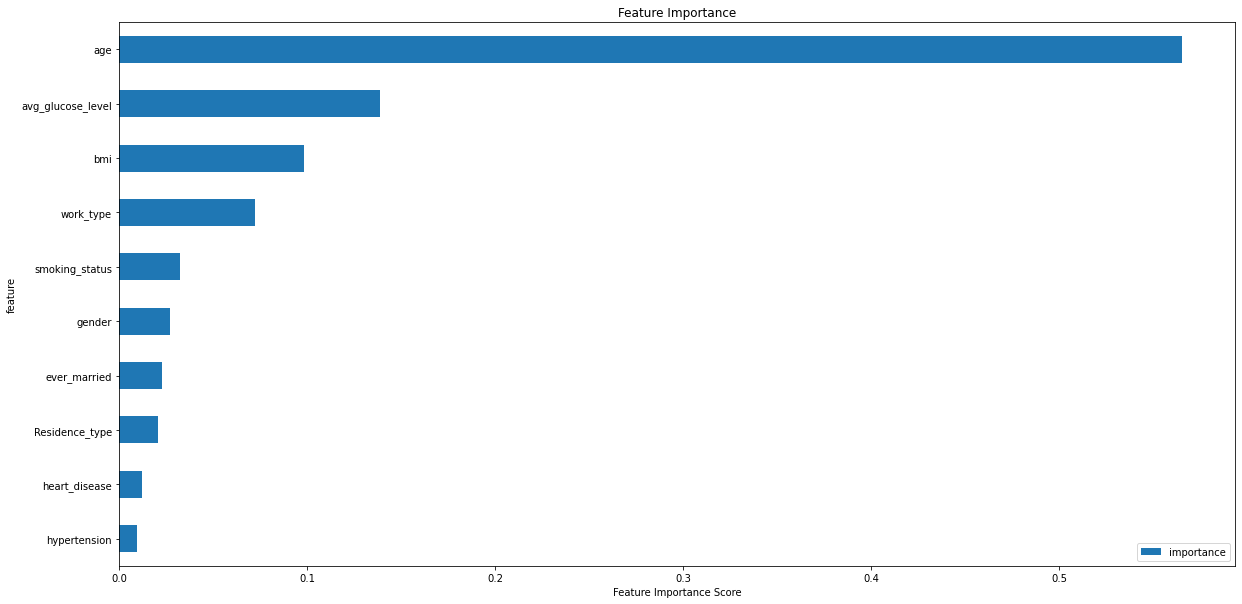

In [102]:
feat_imp = pd.DataFrame({'importance':model_100.feature_importances_})    
feat_imp['feature'] = X_train1.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:10]

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=False)
feat_imp.plot.barh(title="Feature Importance", figsize=(20,10))
plt.xlabel('Feature Importance Score')

In [87]:
model_100.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, random_state=33)

In [88]:
y_pred_GradB=model_100.predict(X_test)

In [89]:
print(classification_report(y_test,y_pred_GradB))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      1479
           1       0.90      0.95      0.93      1438

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917

